# Decision Tree Horse Data

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
data=pd.read_csv("horse.csv")
data.head()

,surgery,age,hospital_number,rectal_temp,pulse,respiratory_rate,temp_of_extremities,peripheral_pulse,mucous_membrane,capillary_refill_time,...,packed_cell_volume,total_protein,abdomo_appearance,abdomo_protein,outcome,surgical_lesion,lesion_1,lesion_2,lesion_3,cp_data
0,no,adult,530101,38.5,66.0,28.0,cool,reduced,NaN,more_3_sec,...,45.0,8.4,NaN,NaN,died,no,11300,0,0,no
1,yes,adult,534817,39.2,88.0,20.0,NaN,NaN,pale_cyanotic,less_3_sec,...,50.0,85.0,cloudy,2.0,euthanized,no,2208,0,0,no
2,no,adult,530334,38.3,40.0,24.0,normal,normal,pale_pink,less_3_sec,...,33.0,6.7,NaN,NaN,lived,no,0,0,0,yes
3,yes,young,5290409,39.1,164.0,84.0,cold,normal,dark_cyanotic,more_3_sec,...,48.0,7.2,serosanguious,5.3,died,yes,2208,0,0,yes
4,no,adult,530255,37.3,104.0,35.0,NaN,NaN,dark_cyanotic,more_3_sec,...,74.0,7.4,NaN,NaN,died,no,4300,0,0,no


In [ ]:
data.shape

(299, 28)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 28 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   surgery                299 non-null    object 
 1   age                    299 non-null    object 
 2   hospital_number        299 non-null    int64  
 3   rectal_temp            239 non-null    float64
 4   pulse                  275 non-null    float64
 5   respiratory_rate       241 non-null    float64
 6   temp_of_extremities    243 non-null    object 
 7   peripheral_pulse       230 non-null    object 
 8   mucous_membrane        252 non-null    object 
 9   capillary_refill_time  267 non-null    object 
 10  pain                   244 non-null    object 
 11  peristalsis            255 non-null    object 
 12  abdominal_distention   243 non-null    object 
 13  nasogastric_tube       195 non-null    object 
 14  nasogastric_reflux     193 non-null    object 
 15  nasoga

In [ ]:
data.isnull().sum()

surgery                    0
age                        0
hospital_number            0
rectal_temp               60
pulse                     24
respiratory_rate          58
temp_of_extremities       56
peripheral_pulse          69
mucous_membrane           47
capillary_refill_time     32
pain                      55
peristalsis               44
abdominal_distention      56
nasogastric_tube         104
nasogastric_reflux       106
nasogastric_reflux_ph    246
rectal_exam_feces        102
abdomen                  118
packed_cell_volume        29
total_protein             33
abdomo_appearance        165
abdomo_protein           198
outcome                    0
surgical_lesion            0
lesion_1                   0
lesion_2                   0
lesion_3                   0
cp_data                    0
dtype: int64

In [ ]:
# split X and Y features
X=data.drop("outcome",axis=1)
y=data["outcome"]

In [ ]:
data_num=X.select_dtypes(include=[np.number])# separate numerical datatype
data_cat=X.select_dtypes(exclude=[np.number]) # separe the object values

In [ ]:
type(data_num)

In [ ]:
data_num.columns

Index(['hospital_number', 'rectal_temp', 'pulse', 'respiratory_rate',
       'nasogastric_reflux_ph', 'packed_cell_volume', 'total_protein',
       'abdomo_protein', 'lesion_1', 'lesion_2', 'lesion_3'],
      dtype='object')

In [ ]:
import numpy as np
from sklearn.impute import SimpleImputer

imp = SimpleImputer(missing_values= np.nan , strategy = "mean")
data_num1=imp.fit_transform(data_num)
# it gives output in nd.arry

In [ ]:
data_num1

array([[5.30101e+05, 3.85000e+01, 6.60000e+01, ..., 1.13000e+04,
        0.00000e+00, 0.00000e+00],
       [5.34817e+05, 3.92000e+01, 8.80000e+01, ..., 2.20800e+03,
        0.00000e+00, 0.00000e+00],
       [5.30334e+05, 3.83000e+01, 4.00000e+01, ..., 0.00000e+00,
        0.00000e+00, 0.00000e+00],
       ...,
       [5.29386e+05, 3.75000e+01, 7.20000e+01, ..., 3.20500e+03,
        0.00000e+00, 0.00000e+00],
       [5.30612e+05, 3.65000e+01, 1.00000e+02, ..., 2.20800e+03,
        0.00000e+00, 0.00000e+00],
       [5.34618e+05, 3.72000e+01, 4.00000e+01, ..., 6.11200e+03,
        0.00000e+00, 0.00000e+00]])

In [ ]:
dnum1=pd.DataFrame(data_num1,columns=data_num.columns)
dnum1.head()

,hospital_number,rectal_temp,pulse,respiratory_rate,nasogastric_reflux_ph,packed_cell_volume,total_protein,abdomo_protein,lesion_1,lesion_2,lesion_3
0,530101.0,38.5,66.0,28.0,4.707547,45.0,8.4,3.039604,11300.0,0.0,0.0
1,534817.0,39.2,88.0,20.0,4.707547,50.0,85.0,2.000000,2208.0,0.0,0.0
2,530334.0,38.3,40.0,24.0,4.707547,33.0,6.7,3.039604,0.0,0.0,0.0
3,5290409.0,39.1,164.0,84.0,5.000000,48.0,7.2,5.300000,2208.0,0.0,0.0
4,530255.0,37.3,104.0,35.0,4.707547,74.0,7.4,3.039604,4300.0,0.0,0.0


In [ ]:
# Type casting
dnum1["hospital_number"]=dnum1["hospital_number"].astype(int)
dnum1.head()

,hospital_number,rectal_temp,pulse,respiratory_rate,nasogastric_reflux_ph,packed_cell_volume,total_protein,abdomo_protein,lesion_1,lesion_2,lesion_3
0,530101,38.5,66.0,28.0,4.707547,45.0,8.4,3.039604,11300.0,0.0,0.0
1,534817,39.2,88.0,20.0,4.707547,50.0,85.0,2.000000,2208.0,0.0,0.0
2,530334,38.3,40.0,24.0,4.707547,33.0,6.7,3.039604,0.0,0.0,0.0
3,5290409,39.1,164.0,84.0,5.000000,48.0,7.2,5.300000,2208.0,0.0,0.0
4,530255,37.3,104.0,35.0,4.707547,74.0,7.4,3.039604,4300.0,0.0,0.0


# Encoding the categorical values

In [ ]:
data_cat=pd.get_dummies(data_cat)
data_cat.head()

,surgery_no,surgery_yes,age_adult,age_young,temp_of_extremities_cold,temp_of_extremities_cool,temp_of_extremities_normal,temp_of_extremities_warm,peripheral_pulse_absent,peripheral_pulse_increased,...,abdomen_firm,abdomen_normal,abdomen_other,abdomo_appearance_clear,abdomo_appearance_cloudy,abdomo_appearance_serosanguious,surgical_lesion_no,surgical_lesion_yes,cp_data_no,cp_data_yes
0,1,0,1,0,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
1,0,1,1,0,0,0,0,0,0,0,...,0,0,1,0,1,0,1,0,1,0
2,1,0,1,0,0,0,1,0,0,0,...,0,1,0,0,0,0,1,0,0,1
3,0,1,0,1,1,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,1
4,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0


In [ ]:
imp1 = SimpleImputer(missing_values= np.nan , strategy = "most_frequent",) #i.e we are going to fill
#the missing values of all the columns with the mode value
data_cat1=imp.fit_transform(data_cat)

In [ ]:
dcat1=pd.DataFrame(data_cat1,columns=data_cat.columns)
dcat1.head()

,surgery_no,surgery_yes,age_adult,age_young,temp_of_extremities_cold,temp_of_extremities_cool,temp_of_extremities_normal,temp_of_extremities_warm,peripheral_pulse_absent,peripheral_pulse_increased,...,abdomen_firm,abdomen_normal,abdomen_other,abdomo_appearance_clear,abdomo_appearance_cloudy,abdomo_appearance_serosanguious,surgical_lesion_no,surgical_lesion_yes,cp_data_no,cp_data_yes
0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
2,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
3,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
4,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0


In [ ]:
finaldata=pd.concat([dnum1,dcat1],axis=1)
finaldata.head()

,hospital_number,rectal_temp,pulse,respiratory_rate,nasogastric_reflux_ph,packed_cell_volume,total_protein,abdomo_protein,lesion_1,lesion_2,...,abdomen_firm,abdomen_normal,abdomen_other,abdomo_appearance_clear,abdomo_appearance_cloudy,abdomo_appearance_serosanguious,surgical_lesion_no,surgical_lesion_yes,cp_data_no,cp_data_yes
0,530101,38.5,66.0,28.0,4.707547,45.0,8.4,3.039604,11300.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1,534817,39.2,88.0,20.0,4.707547,50.0,85.0,2.000000,2208.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
2,530334,38.3,40.0,24.0,4.707547,33.0,6.7,3.039604,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
3,5290409,39.1,164.0,84.0,5.000000,48.0,7.2,5.300000,2208.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
4,530255,37.3,104.0,35.0,4.707547,74.0,7.4,3.039604,4300.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0


# Encode the output label

In [ ]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
y=le.fit_transform(y)

In [ ]:
print(y)

[0 1 2 0 0 2 2 0 1 2 2 2 2 0 2 0 0 2 2 2 2 2 2 2 2 2 2 2 0 2 0 1 2 2 2 1 1
 2 2 0 0 2 2 1 1 0 2 2 0 0 2 0 2 2 1 0 2 0 0 0 2 2 0 1 2 2 2 2 2 2 1 2 0 0
 0 1 2 2 0 2 0 2 2 0 2 2 0 1 2 2 2 0 2 0 2 2 2 1 2 2 2 1 2 2 0 2 2 2 1 0 0
 2 2 0 2 2 2 1 2 2 2 1 2 0 1 2 2 2 1 2 0 0 2 0 0 0 2 2 2 2 0 0 2 1 2 2 0 2
 2 2 0 2 2 2 2 2 1 2 2 2 0 2 1 2 1 2 2 2 1 2 0 2 0 0 2 2 0 2 1 0 2 0 2 2 2
 2 2 2 2 2 2 2 0 2 2 1 0 2 2 2 0 1 2 2 1 2 0 1 2 0 0 2 2 2 2 2 2 1 2 1 2 2
 2 2 2 0 2 1 2 2 0 2 2 2 0 2 2 1 1 0 2 0 2 2 0 2 0 2 2 1 0 0 2 2 0 1 0 2 0
 2 2 2 0 2 1 2 2 2 2 0 2 2 0 1 0 1 2 2 2 2 0 0 2 2 2 1 2 2 2 2 0 0 1 2 1 1
 0 2 1]


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(finaldata,y, test_size = 0.2 , random_state = 21)

In [ ]:
print("Shape of the training features is ", X_train.shape)
print("Shape of the training target is ", y_train.shape)
print("Shape of the testing features is ", X_test.shape)
print("Shape of the testing target is ", y_test.shape)

Shape of the training features is  (239, 67)
Shape of the training target is  (239,)
Shape of the testing features is  (60, 67)
Shape of the testing target is  (60,)


# Building the Decison Tree Model

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
dt.fit(X_train,y_train)
ypredtrain=dt.predict(X_train)

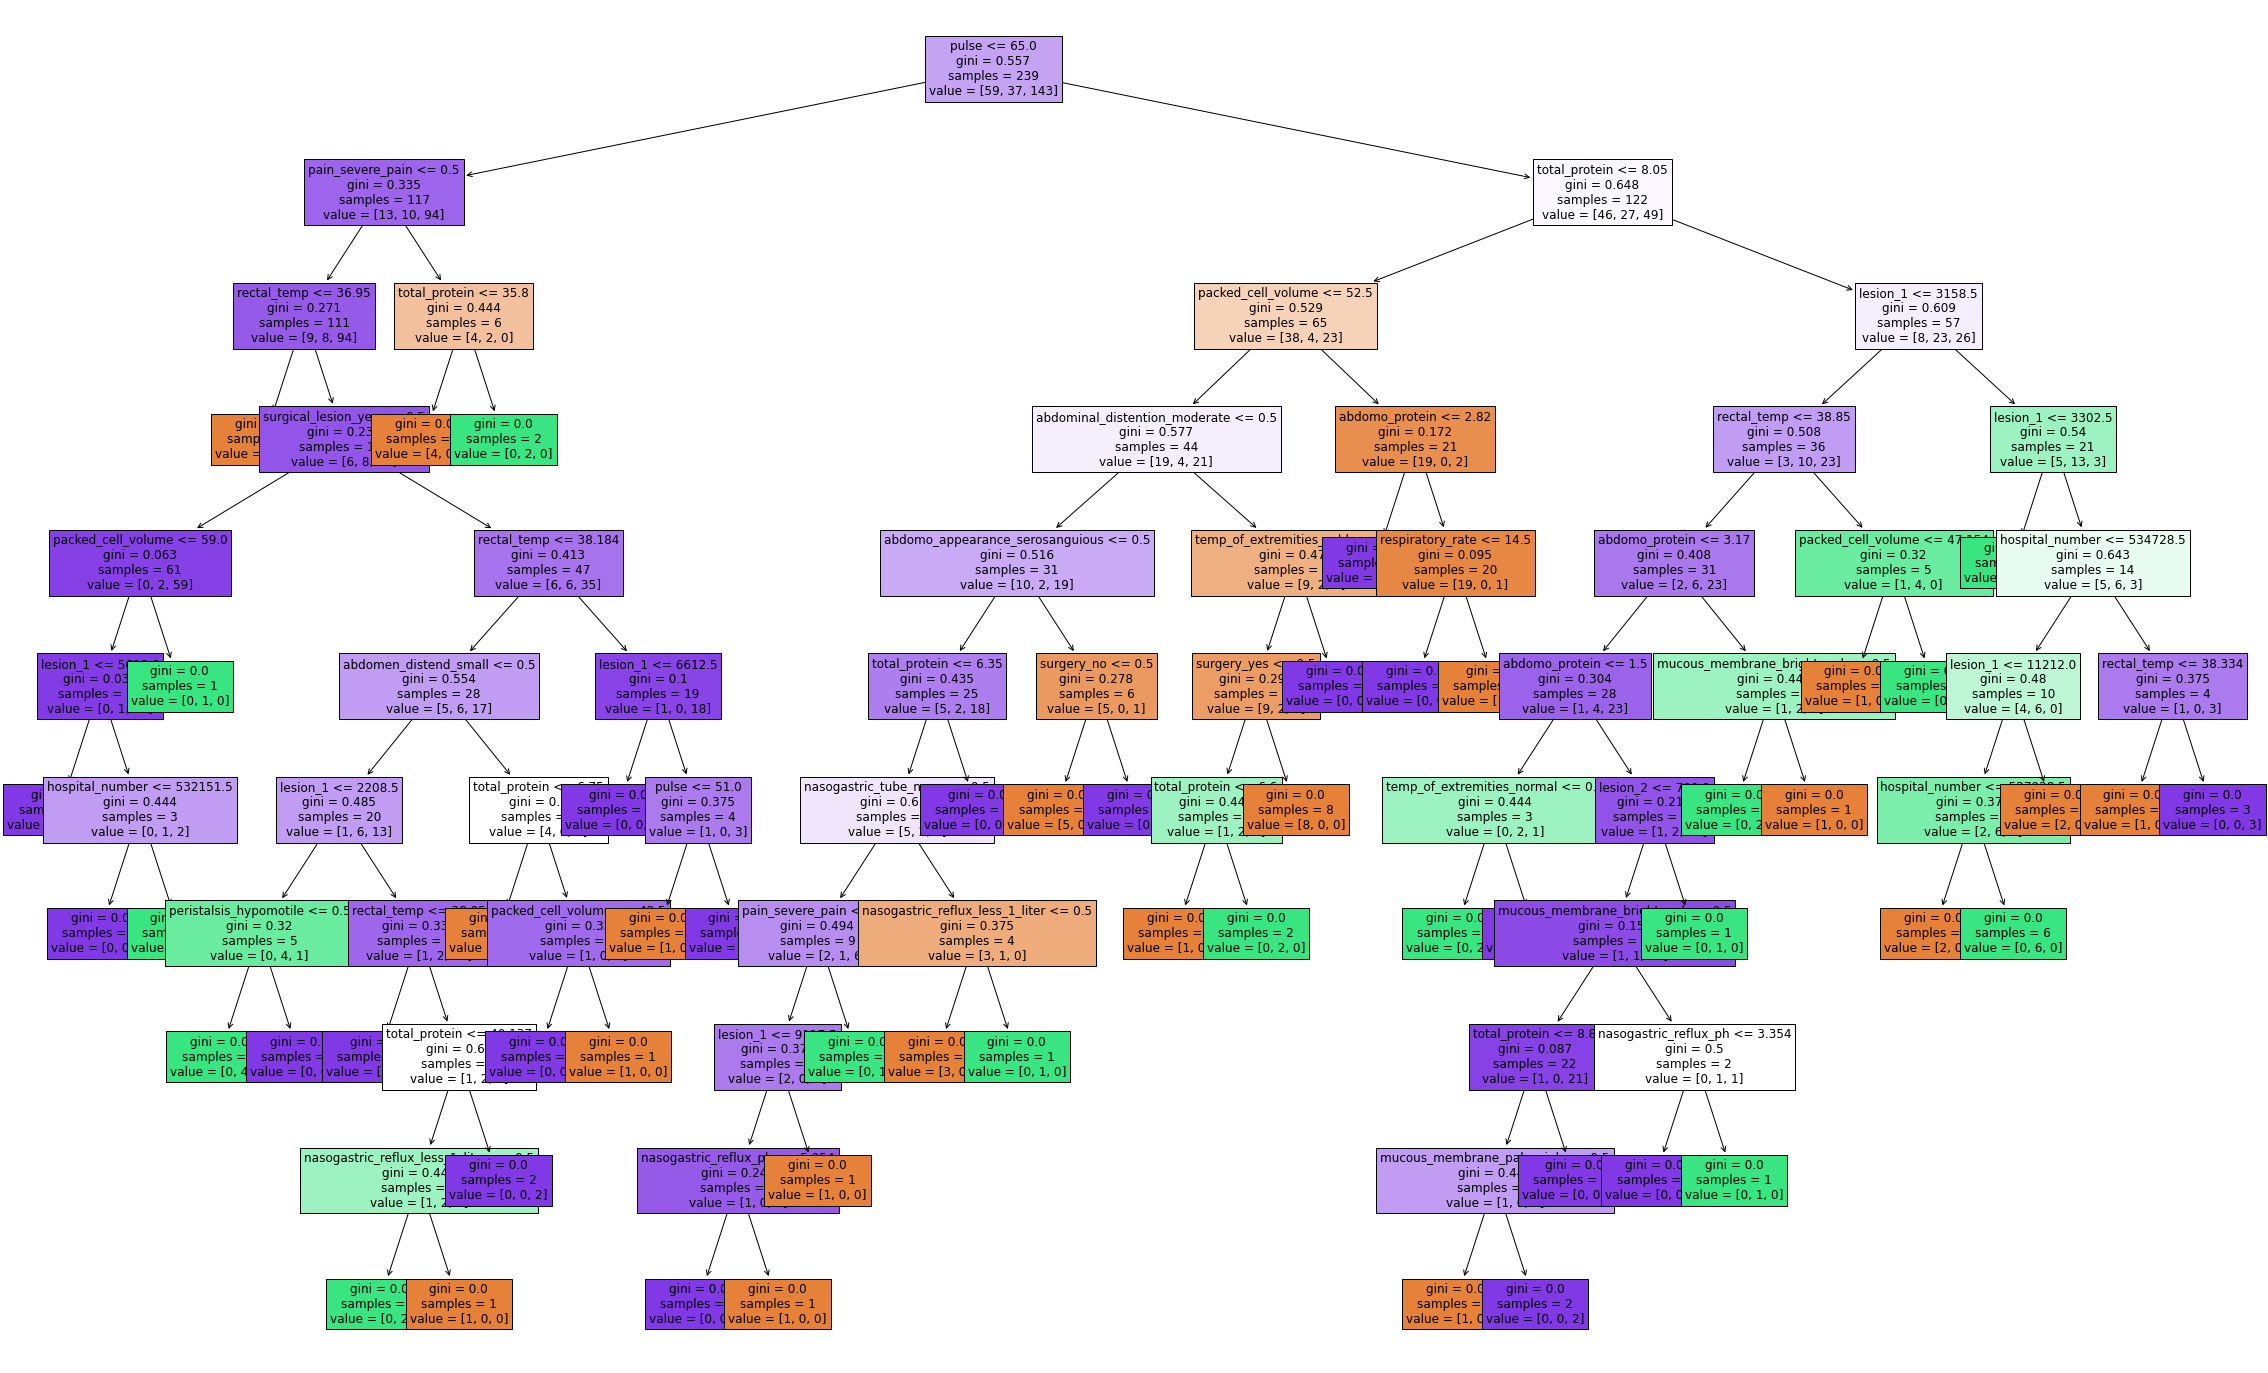

In [ ]:
from sklearn import tree
plt.figure(figsize=(40,25))
tree.plot_tree(dt,feature_names=finaldata.columns,filled=True,fontsize=12)
plt.show()

In [ ]:
from sklearn.metrics import classification_report,accuracy_score
print("The train data accuracy of the DT model is ",accuracy_score(y_train , ypredtrain))

The train data accuracy of the DT model is  1.0


# Testing Performance

In [ ]:
ypredtest=dt.predict(X_test)

In [ ]:
print("The test data accuracy of the DT model is ",accuracy_score(y_test , ypredtest))

The test data accuracy of the DT model is  0.6166666666666667


In [ ]:
print(classification_report(y_test,ypredtest))

In [ ]:
print("The depth of the DT model before pruning is :")
print(dt.get_depth())

The depth of the DT model before pruning is :
10


# Pruning the DT model to avoid overfitting


In [ ]:
dtp=DecisionTreeClassifier(max_depth=5)
dtp.fit(X_train,y_train)
ypredtrain=dtp.predict(X_train)

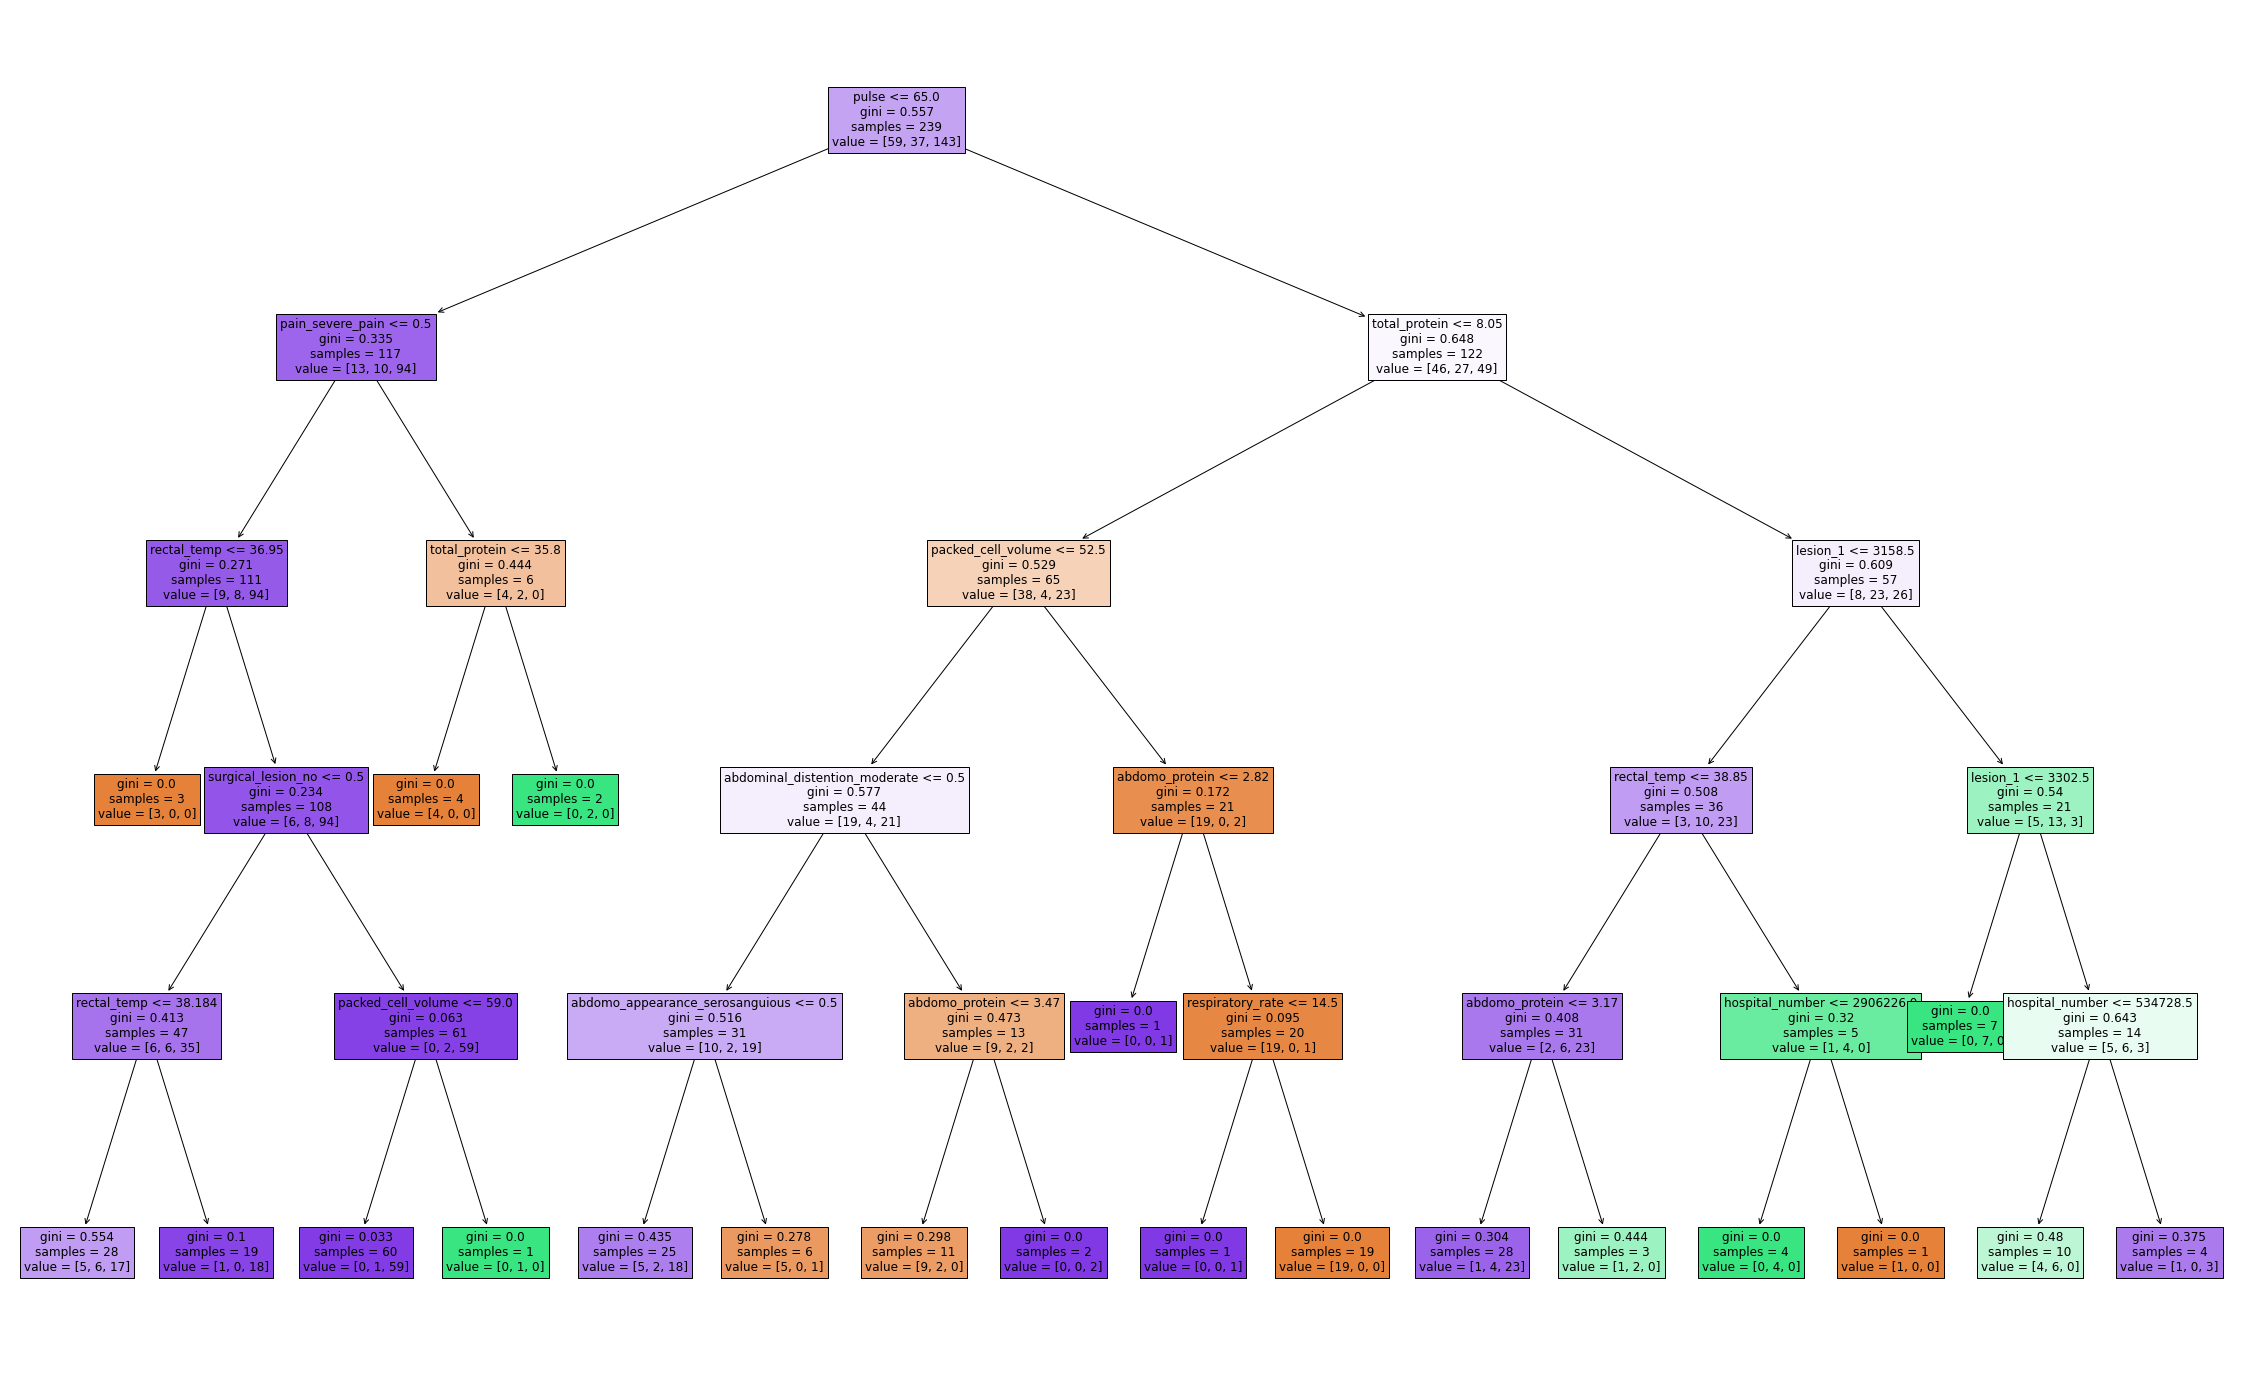

In [ ]:
from sklearn import tree
plt.figure(figsize=(40,25))
tree.plot_tree(dtp,feature_names=finaldata.columns,filled=True,fontsize=12)
plt.show()

In [ ]:
from sklearn.metrics import classification_report,accuracy_score
print("The train data accuracy of the DT model is ",accuracy_score(y_train , ypredtrain))

The train data accuracy of the DT model is  0.8577405857740585


In [ ]:
ypredtest=dt.predict(X_test)

In [ ]:
print("The test data accuracy of the DT model is ",accuracy_score(y_test , ypredtest))

The test data accuracy of the DT model is  0.6166666666666667


# End of Decison Tree